# Spaceship Titanic

In [37]:
import numpy as np
import pandas as pd

In [38]:
train = pd.read_csv("~/DataspellProjects/dsProject/data/titanic_data/train.csv")
test = pd.read_csv("~/DataspellProjects/dsProject/data/titanic_data/test.csv")

In [39]:
train.head(n=5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [40]:
test.head(n=5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [42]:
num_cols = [
    "Age",
    "RoomService",
    "FoodCourt",
    "ShoppingMall",
    "Spa",
    "VRDeck"
]

cat_cols = [
    "PassengerId",
    "HomePlanet",
    "CryoSleep",
    "Cabin",
    "Destination",
    "VIP",
    "Name"
]

feature_cols = num_cols + cat_cols
target_col = "Transported"

## Data preprocessing

**Numerical features**

In [43]:
train[num_cols].isna().sum()

Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

In [44]:
for i in num_cols:
    train[i] = train[i].fillna(np.mean(train[i]))

In [45]:
train[num_cols].isna().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [46]:
train["CryoSleep"] = train["CryoSleep"].astype(bool)
train["VIP"] = train["VIP"].astype(bool)

Let's add `GroupSize` feature to the data:

In [47]:
exp_train = train.copy() # Copy of a train data for experiments

In [48]:
def add_group_size(data: pd.DataFrame) -> pd.DataFrame:
    group = data.PassengerId.str.split("_", expand=True)[0]
    group_value_counts = group.value_counts()
    group_size = group.apply(lambda x: group_value_counts[x]).astype(int)
    data.insert(1, "GroupSize", group_size)
    return data

In [49]:
add_group_size(exp_train)
exp_train.head(n=5)

,PassengerId,GroupSize,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,2,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,1,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Categorical features**

In [50]:
train[cat_cols].isna().sum()

PassengerId      0
HomePlanet     201
CryoSleep        0
Cabin          199
Destination    182
VIP              0
Name           200
dtype: int64

In [51]:
train[cat_cols] = train[cat_cols].fillna("Unknown")

In [52]:
train[cat_cols].isna().sum()

PassengerId    0
HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
VIP            0
Name           0
dtype: int64

## Data analysis

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

**Target distribution**

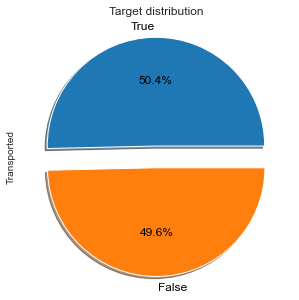

In [68]:
plt.figure(figsize=(5, 5))
train[target_col].value_counts().plot.pie(explode=[0.1, 0.1], autopct="%1.1f%%", shadow=True,
textprops={"fontsize": 12, "color": "black"}).set_title("Target distribution");

From the plot above we can see that the target variable is highly balanced.

**Numerical features analysis**

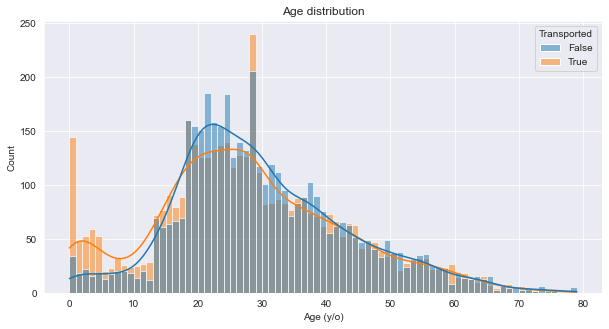

In [73]:
plt.figure(figsize=(10, 5))
sns.histplot(data=train, x="Age", hue=target_col, binwidth=1, kde=True)
plt.title("Age distribution")
plt.xlabel("Age (y/o)");

+ 0-18 y/o passengers more likely to be transported than not.
+ 18-25 y/o passengers less likely to be transported than not.
+ Over 25 y/o people are about equally likely to be transported than not.

Let's create new features that will divide our passangers into age groups. But before this we should analyze features where passengers have spent some money. These features are: `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`.

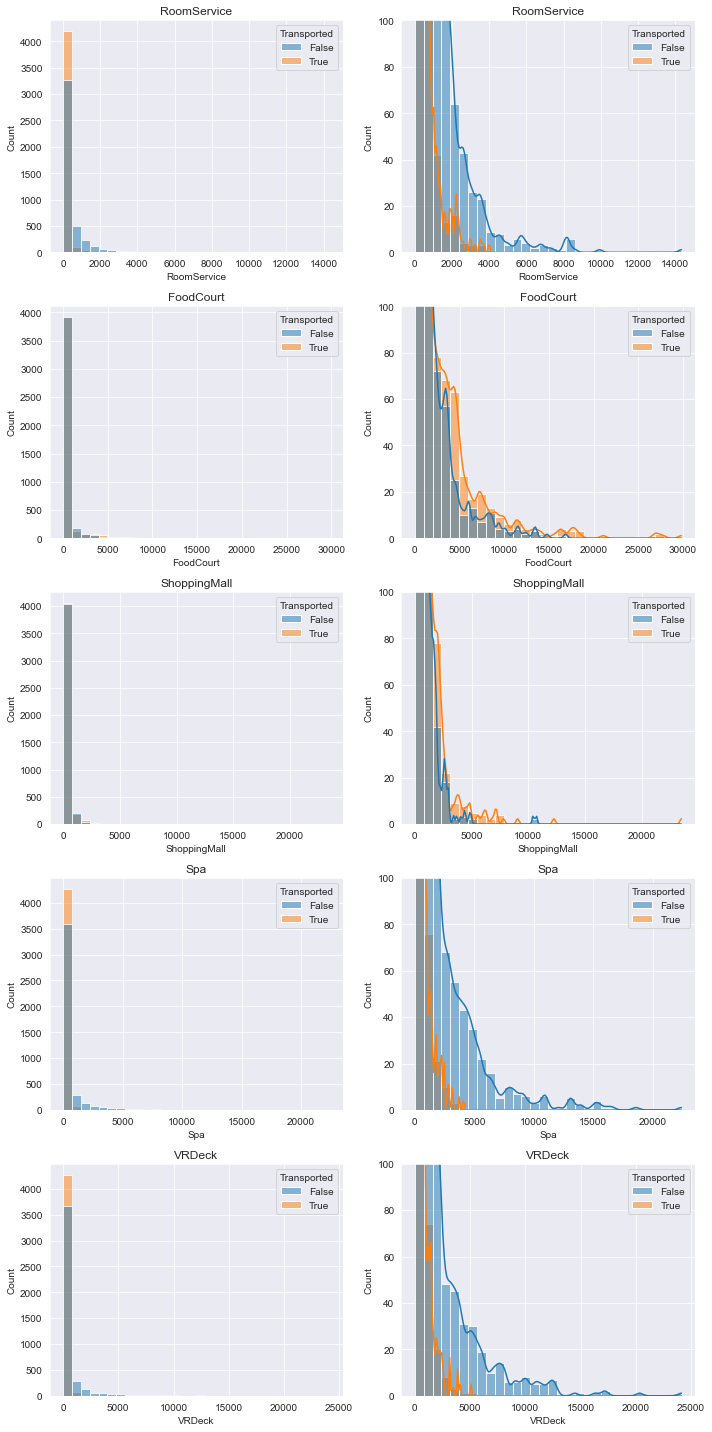

In [79]:
amenities = num_cols[1:]

fig = plt.figure(figsize=(10, 20))
for i, var_name in enumerate(amenities):
    # Left plot
    ax = fig.add_subplot(5, 2, 2 * i + 1)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=False, hue=target_col)
    ax.set_title(var_name)

    # Right plot
    ax = fig.add_subplot(5, 2, 2 * i + 2)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=True, hue=target_col)
    plt.ylim([0, 100])
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

## Linear models

In [22]:
#from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
train_initial = train[feature_cols].copy()
test_initial = test.copy()
y = train[target_col]

In [24]:
dummy_data_train = pd.get_dummies(train[cat_cols], drop_first=True)
train = pd.concat([train[num_cols], dummy_data_train], axis=1)

dummy_data_test = pd.get_dummies(test[cat_cols], drop_first=True)
test = pd.concat([test[num_cols], dummy_data_test], axis=1)

X = train

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, stratify=y)

In [26]:
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_valid[num_cols] = scaler.transform(X_valid[num_cols])
X[num_cols] = scaler.transform(X[num_cols])
test[num_cols] = scaler.transform(test[num_cols])

In [27]:
#log_reg_cv = LogisticRegressionCV(cv=5, scoring="accuracy", refit=True, random_state=42).fit(X, y)

In [28]:
import catboost
from sklearn.metrics import accuracy_score

In [29]:
X_train, X_valid, y_train, y_valid = train_test_split(train_initial, y, test_size=0.2, random_state=0, stratify=y)

In [30]:
boost_model = catboost.CatBoostClassifier(iterations=500, depth=3, cat_features=cat_cols)
boost_model.fit(X_train, y_train)

y_train_pred = boost_model.predict_proba(X_train)[:, 1]
y_valid_pred = boost_model.predict_proba(X_valid)[:, 1]
accuracy_score(y_train, y_train_pred), accuracy_score(y_valid, y_valid_pred)

Learning rate set to 0.044526
0:	learn: 0.6770469	total: 193ms	remaining: 1m 36s
1:	learn: 0.6629458	total: 212ms	remaining: 52.9s
2:	learn: 0.6495659	total: 231ms	remaining: 38.2s
3:	learn: 0.6381879	total: 247ms	remaining: 30.7s
4:	learn: 0.6292413	total: 264ms	remaining: 26.2s
5:	learn: 0.6193987	total: 282ms	remaining: 23.3s
6:	learn: 0.6116289	total: 303ms	remaining: 21.4s
7:	learn: 0.6035925	total: 321ms	remaining: 19.7s
8:	learn: 0.5963058	total: 340ms	remaining: 18.6s
9:	learn: 0.5897024	total: 361ms	remaining: 17.7s
10:	learn: 0.5835750	total: 379ms	remaining: 16.9s
11:	learn: 0.5781829	total: 398ms	remaining: 16.2s
12:	learn: 0.5721385	total: 414ms	remaining: 15.5s
13:	learn: 0.5669645	total: 432ms	remaining: 15s
14:	learn: 0.5628666	total: 450ms	remaining: 14.6s
15:	learn: 0.5582288	total: 467ms	remaining: 14.1s
16:	learn: 0.5540756	total: 485ms	remaining: 13.8s
17:	learn: 0.5495456	total: 503ms	remaining: 13.5s
18:	learn: 0.5445714	total: 521ms	remaining: 13.2s
19:	learn: 0

ValueError: Classification metrics can't handle a mix of binary and continuous targets